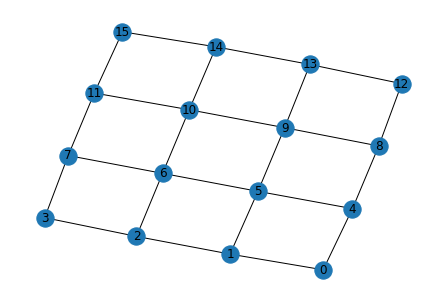

In [101]:
import networkx as nx
import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout

# Create graph
G = nx.Graph()

# Add nodes and edges
for i in range(16):
    G.add_edge(i, i+4)
    G.add_edge(i, i-4)
    G.add_edge(i, i+1)
    G.add_edge(i, i-1)
G.remove_edge(3, 4)
G.remove_edge(7, 8)
G.remove_edge(11, 12)
G.remove_nodes_from([n for n in G.nodes if n >= 16 or n < 0])

nx.draw(G, with_labels=True, pos=graphviz_layout(G))

In [102]:
bfs0 = nx.bfs_tree(G, 0)
dfs0 = nx.dfs_tree(G, 0)
# nx.draw(bfs0, with_labels=True, pos=graphviz_layout(bfs0))
# nx.draw(dfs0, with_labels=True, pos=graphviz_layout(dfs0))
# order = list(bfs0.nodes)
# order = list(dfs0.nodes)
order = range(16)
# order = [0, 1, 4, 2, 5, 8, 3, 6, 9, 12, 7, 10, 13, 11, 14, 15] # equivalent to bfs
# order = [0, 1, 2, 3, 7, 6, 5, 4, 8, 9, 10, 11, 15, 14, 13, 12]
print(order)

torder = [0,1,2,3]
import itertools
order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] # sequential order
for t in itertools.permutations(torder):
    order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] # sequential order
    order = [(((i >> 3) & 1) << t[0]) | (((i >> 2) & 1) << t[1]) | (((i >> 1) & 1) << t[2]) | (((i >> 0) & 1) << t[3]) for i in order]
    print(t)
    print(order)
    # for ts in nx.all_topological_sorts(bfs0):
    #     print(ts)

    dists = []
    for i in range(16):
        # print(f"NODE {i}")
        for n in G[i]:
            dist = abs(order.index(n) - order.index(i))
            dists.append(dist)
            # print(f"Neighbor {n} is distance {dist}")
        # print()
    dists = np.array(dists)
    print("Mean dist:", dists.mean())
    print("Stdev dist:", dists.std())


range(0, 16)
(0, 1, 2, 3)
[0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]
Mean dist: 4.166666666666667
Stdev dist: 2.852873794770615
(0, 1, 3, 2)
[0, 4, 8, 12, 2, 6, 10, 14, 1, 5, 9, 13, 3, 7, 11, 15]
Mean dist: 3.8333333333333335
Stdev dist: 3.131382371342656
(0, 2, 1, 3)
[0, 8, 2, 10, 4, 12, 6, 14, 1, 9, 3, 11, 5, 13, 7, 15]
Mean dist: 5.5
Stdev dist: 1.9790570145063195
(0, 2, 3, 1)
[0, 2, 8, 10, 4, 6, 12, 14, 1, 3, 9, 11, 5, 7, 13, 15]
Mean dist: 5.5
Stdev dist: 2.29128784747792
(0, 3, 1, 2)
[0, 4, 2, 6, 8, 12, 10, 14, 1, 5, 3, 7, 9, 13, 11, 15]
Mean dist: 4.5
Stdev dist: 2.9860788111948193
(0, 3, 2, 1)
[0, 2, 4, 6, 8, 10, 12, 14, 1, 3, 5, 7, 9, 11, 13, 15]
Mean dist: 4.833333333333333
Stdev dist: 2.852873794770615
(1, 0, 2, 3)
[0, 8, 4, 12, 1, 9, 5, 13, 2, 10, 6, 14, 3, 11, 7, 15]
Mean dist: 2.8333333333333335
Stdev dist: 1.2133516482134197
(1, 0, 3, 2)
[0, 4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11, 15]
Mean dist: 2.5
Stdev dist: 1.5
(1, 2, 0, 3)
[0, 8, 1, 9, 4, 12, 5, 1